In [1]:
import sys
sys.path.append("../..")


from experiments.plt_pab_fae import plt_fab_fae
from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.BB84TrainableProtocol import BB84TrainableProtocol
from protocol.connection_elements.Layer import SeparableLayer, EntangledLayer
from protocol.BB84Protocol import BB84Protocol
from protocol.connection_elements.MultiQubitQCLEve import MultiQubitQCLEve


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


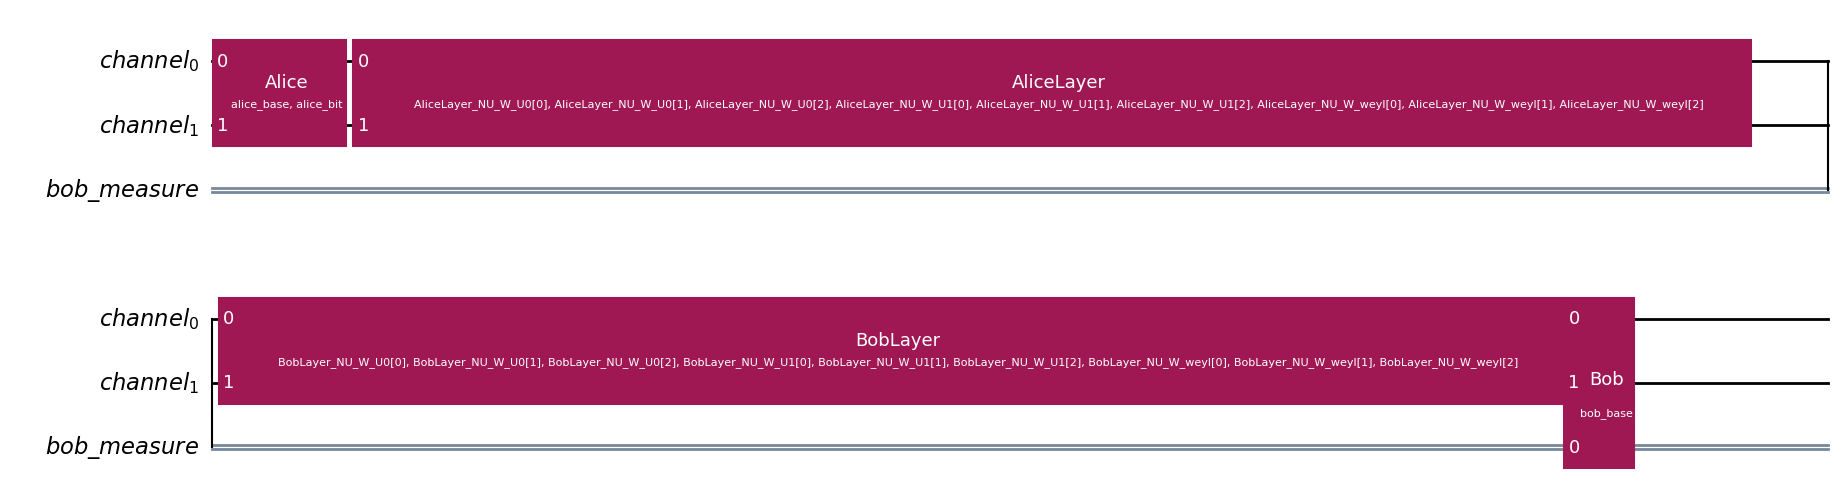

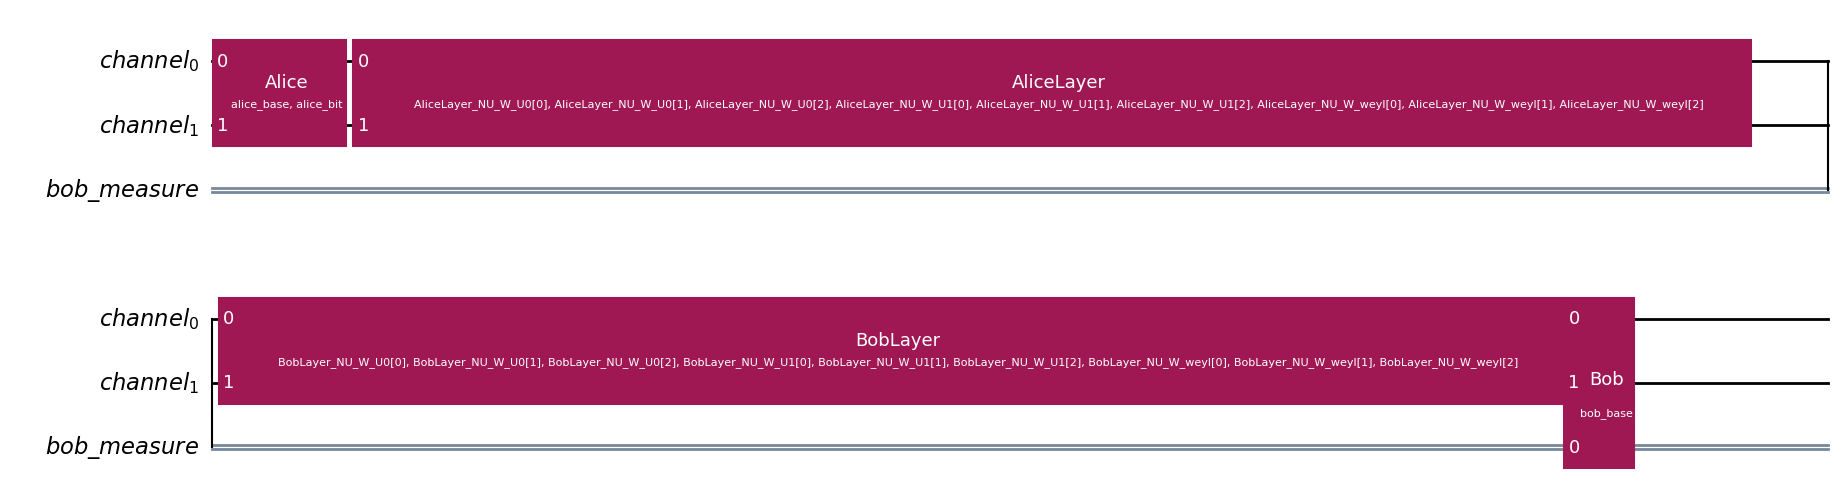

In [2]:
layers = [EntangledLayer("AliceLayer"), EntangledLayer("BobLayer")]
eve = MultiQubitQCLEve()

ab_protocol = BB84TrainableProtocol(n_bits=512, elements=layers, channel_size=2, seed=0, learning_rate=0.1)
eve_protocol = BB84EveTrainableProtocol(n_bits=512, elements=[layers[0], eve, layers[1]], channel_size=2,
                                        seed=0, alpha=1, learning_rate=0.1)

qc, _ = ab_protocol.qc_with_ctx()
qc.draw("mpl", expr_len=3)

In [3]:
def train_eve():
    bob_qber, eve_qber = [], []
    qber = eve_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(qber['eve_qber'])
    print(f'start QBER: {qber}')
    for epoch in range(50):
        loss = eve_protocol.train()
        qber = eve_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(qber['eve_qber'])
        if epoch % 5 == 0 or epoch == 49:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

def train_ab():
    bob_qber, eve_qber = [], []
    qber = ab_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(0.5)
    print(f'start QBER: {qber}')
    for epoch in range(20):
        loss = ab_protocol.train()
        qber = ab_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(0.5)
        if epoch % 5 == 0 or epoch == 19:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

# Krok 1 - trenowanie Alice i Boba do początkowego stanu
Uczymy Alice i Boba bez Eve, aby miały sensowne parametry początkowe i potrafiły przekazywać sobie dane.

In [4]:
b_q, e_q = train_ab()

start QBER: {'bob_qber': np.float64(0.5277777777777778)}
epoch: 0, loss: -0.4866735339164734, QBER: {'bob_qber': np.float64(0.373015873015873)}
epoch: 5, loss: -0.9009238481521606, QBER: {'bob_qber': np.float64(0.06349206349206349)}
epoch: 10, loss: -0.9754096269607544, QBER: {'bob_qber': np.float64(0.031746031746031744)}
epoch: 15, loss: -0.9912437200546265, QBER: {'bob_qber': np.float64(0.003968253968253954)}
epoch: 19, loss: -0.981707751750946, QBER: {'bob_qber': np.float64(0.011904761904761862)}


<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

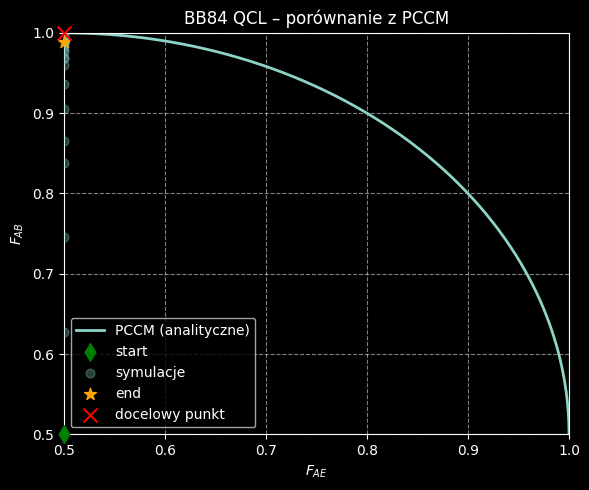

In [5]:
plt_fab_fae(b_q, e_q, 1)

# Krok 2 - trenowanie tylko Eve, warstwy Alice i Boba zamrożone
Uczymy samą Eve, docelowa dokładność Boba to 0.8. Startujemy od parametrów Alice i Boba wytrenowanych w poprzednim kroku i Eve jako identyczność.

In [6]:
eve_protocol.set_parameters(ab_protocol.get_all_parameters())

params = eve_protocol.get_all_parameters()
for p in eve.nu.params():
    k = p.name
    params[k] = 0

eve_protocol.set_parameters(params)
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.0), 'NU_W_0_0_U0[1]': np.float32(0.0), 'NU_W_0_0_U0[2]': np.float32(0.0), 'NU_W_0_0_U1[0]': np.float32(0.0), 'NU_W_0_0_U1[1]': np.float32(0.0), 'NU_W_0_0_U1[2]': np.float32(0.0), 'NU_W_0_0_weyl[0]': np.float32(0.0), 'NU_W_0_0_weyl[1]': np.float32(0.0), 'NU_W_0_0_weyl[2]': np.float32(0.0), 'NU_W_0_1_U0[0]': np.float32(0.0), 'NU_W_0_1_U0[1]': np.float32(0.0), 'NU_W_0_1_U0[2]': np.float32(0.0), 'NU_W_0_1_U1[0]': np.float32(0.0), 'NU_W_0_1_U1[1]': np.float32(0.0), 'NU_W_0_1_U1[2]': np.float32(0.0), 'NU_W_0_1_weyl[0]': np.float32(0.0), 'NU_W_0_1_weyl[1]': np.float32(0.0), 'NU_W_0_1_weyl[2]': np.float32(0.0), 'NU_W_1_0_U0[0]': np.float32(0.0), 'NU_W_1_0_U0[1]': np.float32(0.0), 'NU_W_1_0_U0[2]': np.float32(0.0), 'NU_W_1_0_U1[0]': np.float32(0.0), 'NU_W_1_0_U1[1]': np.float32(0.0), 'NU_W_1_0_U1[2]': np.float32(0.0), 'NU_W_1_0_weyl[0]': np.float32(0.0), 'NU_W_1_0_weyl[1]': np.float32(0.0), 'NU_W_1_0_weyl[2]': np.float32(0.0), 'NU_W_2_0_U0[0

In [7]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss9
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.014705882352941124), 'eve_qber': np.float64(0.5367647058823529)}
epoch: 0, loss: -0.9621691703796387, QBER: {'bob_qber': np.float64(0.018382352941176516), 'eve_qber': np.float64(0.5294117647058824)}
epoch: 5, loss: -0.981686532497406, QBER: {'bob_qber': np.float64(0.007352941176470562), 'eve_qber': np.float64(0.5330882352941176)}
epoch: 10, loss: -0.9888150691986084, QBER: {'bob_qber': np.float64(0.003676470588235281), 'eve_qber': np.float64(0.5551470588235294)}
epoch: 15, loss: -1.0048800706863403, QBER: {'bob_qber': np.float64(0.003676470588235281), 'eve_qber': np.float64(0.5330882352941176)}
epoch: 20, loss: -1.0002086162567139, QBER: {'bob_qber': np.float64(0.007352941176470562), 'eve_qber': np.float64(0.4742647058823529)}
epoch: 25, loss: -1.0321048498153687, QBER: {'bob_qber': np.float64(0.02941176470588236), 'eve_qber': np.float64(0.38235294117647056)}
epoch: 30, loss: -1.0863624811172485, QBER: {'bob_qber': np.float64(0.03676470588235292), 

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

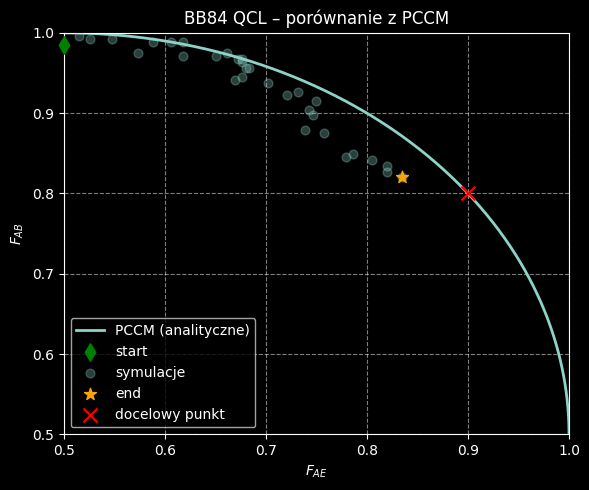

In [8]:
plt_fab_fae(b_q, e_q, 0.8)

# Krok 3 - trenowanie warstw Alice i Boba, Eve zamrożona
Próbujemy uczyć Alice i Boba z użyciem nowej funkcji straty, która maksymalizuje jedynie dokładność Boba.

In [9]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(-0.13601975), 'AliceLayer_NU_W_U0[1]': np.float32(-0.1843686), 'AliceLayer_NU_W_U0[2]': np.float32(0.6067904), 'AliceLayer_NU_W_U1[0]': np.float32(1.821576), 'AliceLayer_NU_W_U1[1]': np.float32(0.03975661), 'AliceLayer_NU_W_U1[2]': np.float32(-0.74790287), 'AliceLayer_NU_W_weyl[0]': np.float32(-0.029176304), 'AliceLayer_NU_W_weyl[1]': np.float32(0.14388822), 'AliceLayer_NU_W_weyl[2]': np.float32(-0.077627316), 'BobLayer_NU_W_U0[0]': np.float32(0.09517611), 'BobLayer_NU_W_U0[1]': np.float32(-1.3345517), 'BobLayer_NU_W_U0[2]': np.float32(0.9552653), 'BobLayer_NU_W_U1[0]': np.float32(1.9654863), 'BobLayer_NU_W_U1[1]': np.float32(-0.41722634), 'BobLayer_NU_W_U1[2]': np.float32(-1.1826209), 'BobLayer_NU_W_weyl[0]': np.float32(0.13472891), 'BobLayer_NU_W_weyl[1]': np.float32(-0.1543183), 'BobLayer_NU_W_weyl[2]': np.float32(0.21488409)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(0.21482359), 'NU_W_0_0_U0[1]': np.float32(-0.36878

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [10]:
eve_loss = eve_protocol.loss
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.18014705882352944), 'eve_qber': np.float64(0.1654411764705882)}
epoch: 0, loss: -0.8310037851333618, QBER: {'bob_qber': np.float64(0.17647058823529416), 'eve_qber': np.float64(0.18382352941176472)}
epoch: 5, loss: -0.8963696956634521, QBER: {'bob_qber': np.float64(0.07352941176470584), 'eve_qber': np.float64(0.2867647058823529)}
epoch: 10, loss: -0.9353177547454834, QBER: {'bob_qber': np.float64(0.05514705882352944), 'eve_qber': np.float64(0.3786764705882353)}
epoch: 15, loss: -0.964621365070343, QBER: {'bob_qber': np.float64(0.02573529411764708), 'eve_qber': np.float64(0.4558823529411765)}
epoch: 20, loss: -0.9687492847442627, QBER: {'bob_qber': np.float64(0.044117647058823484), 'eve_qber': np.float64(0.4963235294117647)}
epoch: 25, loss: -0.9696961641311646, QBER: {'bob_qber': np.float64(0.011029411764705843), 'eve_qber': np.float64(0.5294117647058824)}
epoch: 30, loss: -0.9732685089111328, QBER: {'bob_qber': np.float64(0.011029411764705843), 'ev

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

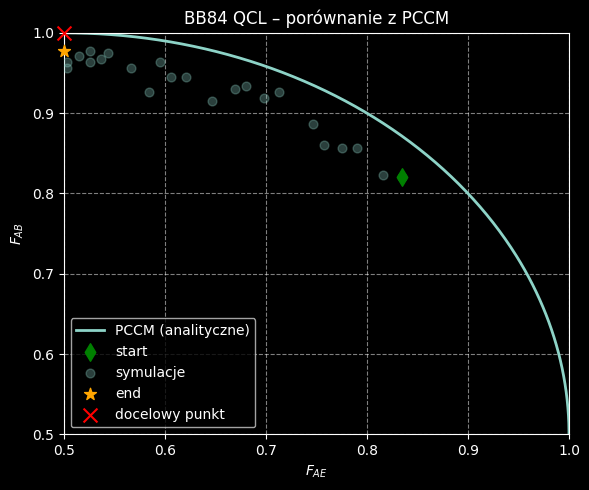

In [11]:
plt_fab_fae(b_q, e_q, 1)

In [12]:
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.21482359), 'NU_W_0_0_U0[1]': np.float32(-0.36878034), 'NU_W_0_0_U0[2]': np.float32(-0.36912385), 'NU_W_0_0_U1[0]': np.float32(0.21718334), 'NU_W_0_0_U1[1]': np.float32(0.7067788), 'NU_W_0_0_U1[2]': np.float32(0.4732475), 'NU_W_0_0_weyl[0]': np.float32(-0.7066886), 'NU_W_0_0_weyl[1]': np.float32(0.064540826), 'NU_W_0_0_weyl[2]': np.float32(-0.018116046), 'NU_W_0_1_U0[0]': np.float32(0.30981433), 'NU_W_0_1_U0[1]': np.float32(-0.35713106), 'NU_W_0_1_U0[2]': np.float32(1.3348151e-08), 'NU_W_0_1_U1[0]': np.float32(-0.47850424), 'NU_W_0_1_U1[1]': np.float32(0.41550466), 'NU_W_0_1_U1[2]': np.float32(9.741731e-09), 'NU_W_0_1_weyl[0]': np.float32(-0.26026875), 'NU_W_0_1_weyl[1]': np.float32(-0.21132761), 'NU_W_0_1_weyl[2]': np.float32(-0.23764634), 'NU_W_1_0_U0[0]': np.float32(-0.83969027), 'NU_W_1_0_U0[1]': np.float32(0.1323358), 'NU_W_1_0_U0[2]': np.float32(0.54387325), 'NU_W_1_0_U1[0]': np.float32(0.26902014), 'NU_W_1_0_U1[1]': np.float32

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [13]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss9
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.022058823529411797), 'eve_qber': np.float64(0.5404411764705883)}
epoch: 0, loss: -0.9209170341491699, QBER: {'bob_qber': np.float64(0.02941176470588236), 'eve_qber': np.float64(0.46691176470588236)}
epoch: 5, loss: -1.0768038034439087, QBER: {'bob_qber': np.float64(0.10661764705882348), 'eve_qber': np.float64(0.2904411764705882)}
epoch: 10, loss: -1.131367564201355, QBER: {'bob_qber': np.float64(0.10661764705882348), 'eve_qber': np.float64(0.26102941176470584)}
epoch: 15, loss: -1.1699328422546387, QBER: {'bob_qber': np.float64(0.14338235294117652), 'eve_qber': np.float64(0.20220588235294112)}
epoch: 20, loss: -1.1607398986816406, QBER: {'bob_qber': np.float64(0.14338235294117652), 'eve_qber': np.float64(0.18382352941176472)}
epoch: 25, loss: -1.180009365081787, QBER: {'bob_qber': np.float64(0.15441176470588236), 'eve_qber': np.float64(0.17647058823529416)}
epoch: 30, loss: -1.170621395111084, QBER: {'bob_qber': np.float64(0.19117647058823528), 'ev

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

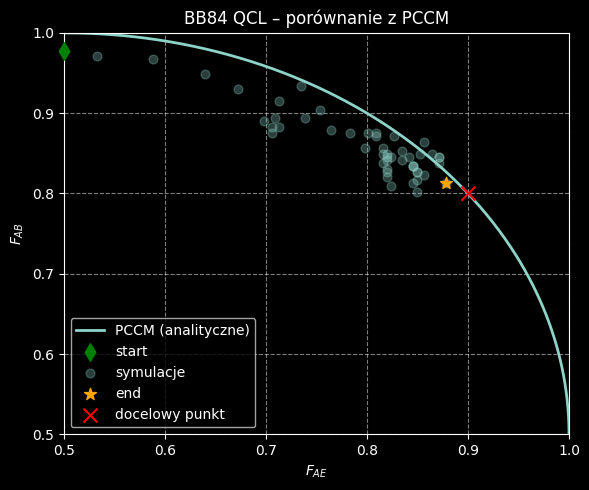

In [14]:
plt_fab_fae(b_q, e_q, 0.8)

In [15]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(-0.2855888), 'AliceLayer_NU_W_U0[1]': np.float32(-0.10757809), 'AliceLayer_NU_W_U0[2]': np.float32(-0.20803906), 'AliceLayer_NU_W_U1[0]': np.float32(0.87462175), 'AliceLayer_NU_W_U1[1]': np.float32(-1.4077766), 'AliceLayer_NU_W_U1[2]': np.float32(-0.74790287), 'AliceLayer_NU_W_weyl[0]': np.float32(0.28024337), 'AliceLayer_NU_W_weyl[1]': np.float32(-0.42262352), 'AliceLayer_NU_W_weyl[2]': np.float32(0.58802795), 'BobLayer_NU_W_U0[0]': np.float32(0.3401821), 'BobLayer_NU_W_U0[1]': np.float32(-0.7496397), 'BobLayer_NU_W_U0[2]': np.float32(1.4573847), 'BobLayer_NU_W_U1[0]': np.float32(1.4294327), 'BobLayer_NU_W_U1[1]': np.float32(0.81759745), 'BobLayer_NU_W_U1[2]': np.float32(-2.0914502), 'BobLayer_NU_W_weyl[0]': np.float32(0.36292744), 'BobLayer_NU_W_weyl[1]': np.float32(0.18136638), 'BobLayer_NU_W_weyl[2]': np.float32(0.34533563)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(0.07429543), 'NU_W_0_0_U0[1]': np.float32(-0.256571

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [16]:
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.1875), 'eve_qber': np.float64(0.12132352941176472)}
epoch: 0, loss: -0.8155904412269592, QBER: {'bob_qber': np.float64(0.15073529411764708), 'eve_qber': np.float64(0.14338235294117652)}
epoch: 5, loss: -0.8690236806869507, QBER: {'bob_qber': np.float64(0.11764705882352944), 'eve_qber': np.float64(0.2536764705882353)}
epoch: 10, loss: -0.8988271951675415, QBER: {'bob_qber': np.float64(0.08088235294117652), 'eve_qber': np.float64(0.31985294117647056)}
epoch: 15, loss: -0.9304330348968506, QBER: {'bob_qber': np.float64(0.02941176470588236), 'eve_qber': np.float64(0.34558823529411764)}
epoch: 20, loss: -0.9399286508560181, QBER: {'bob_qber': np.float64(0.03308823529411764), 'eve_qber': np.float64(0.375)}
epoch: 25, loss: -0.9557514786720276, QBER: {'bob_qber': np.float64(0.03308823529411764), 'eve_qber': np.float64(0.4117647058823529)}
epoch: 30, loss: -0.9754547476768494, QBER: {'bob_qber': np.float64(0.02573529411764708), 'eve_qber': np.float64(0.463

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

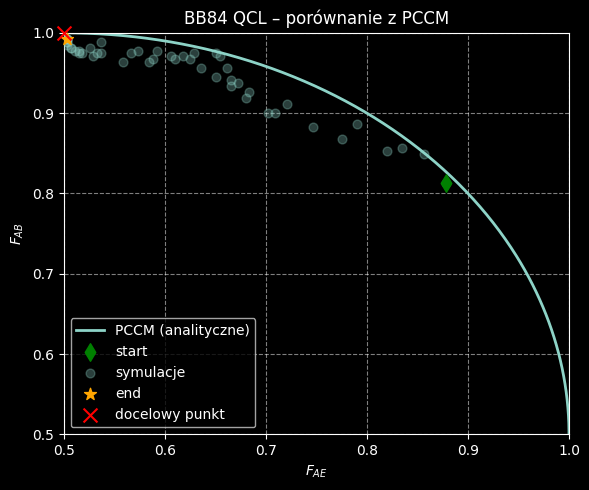

In [17]:
plt_fab_fae(b_q, e_q, 1)

In [18]:
print("All parameters:", eve_protocol.get_all_parameters())

All parameters: {'NU_W_0_0_U0[0]': np.float32(0.07429543), 'NU_W_0_0_U0[1]': np.float32(-0.25657168), 'NU_W_0_0_U0[2]': np.float32(-0.122217506), 'NU_W_0_0_U1[0]': np.float32(0.611025), 'NU_W_0_0_U1[1]': np.float32(0.82105935), 'NU_W_0_0_U1[2]': np.float32(1.1172403), 'NU_W_0_0_weyl[0]': np.float32(-0.8075287), 'NU_W_0_0_weyl[1]': np.float32(-0.114496805), 'NU_W_0_0_weyl[2]': np.float32(-0.17948101), 'NU_W_0_1_U0[0]': np.float32(0.32266217), 'NU_W_0_1_U0[1]': np.float32(-0.3275117), 'NU_W_0_1_U0[2]': np.float32(3.2817866e-08), 'NU_W_0_1_U1[0]': np.float32(-0.048372623), 'NU_W_0_1_U1[1]': np.float32(0.6241335), 'NU_W_0_1_U1[2]': np.float32(7.7324565e-09), 'NU_W_0_1_weyl[0]': np.float32(-0.14350866), 'NU_W_0_1_weyl[1]': np.float32(-0.1309862), 'NU_W_0_1_weyl[2]': np.float32(-0.17089762), 'NU_W_1_0_U0[0]': np.float32(-0.4682339), 'NU_W_1_0_U0[1]': np.float32(-0.20892045), 'NU_W_1_0_U0[2]': np.float32(1.4292024), 'NU_W_1_0_U1[0]': np.float32(0.36123285), 'NU_W_1_0_U1[1]': np.float32(-0.528

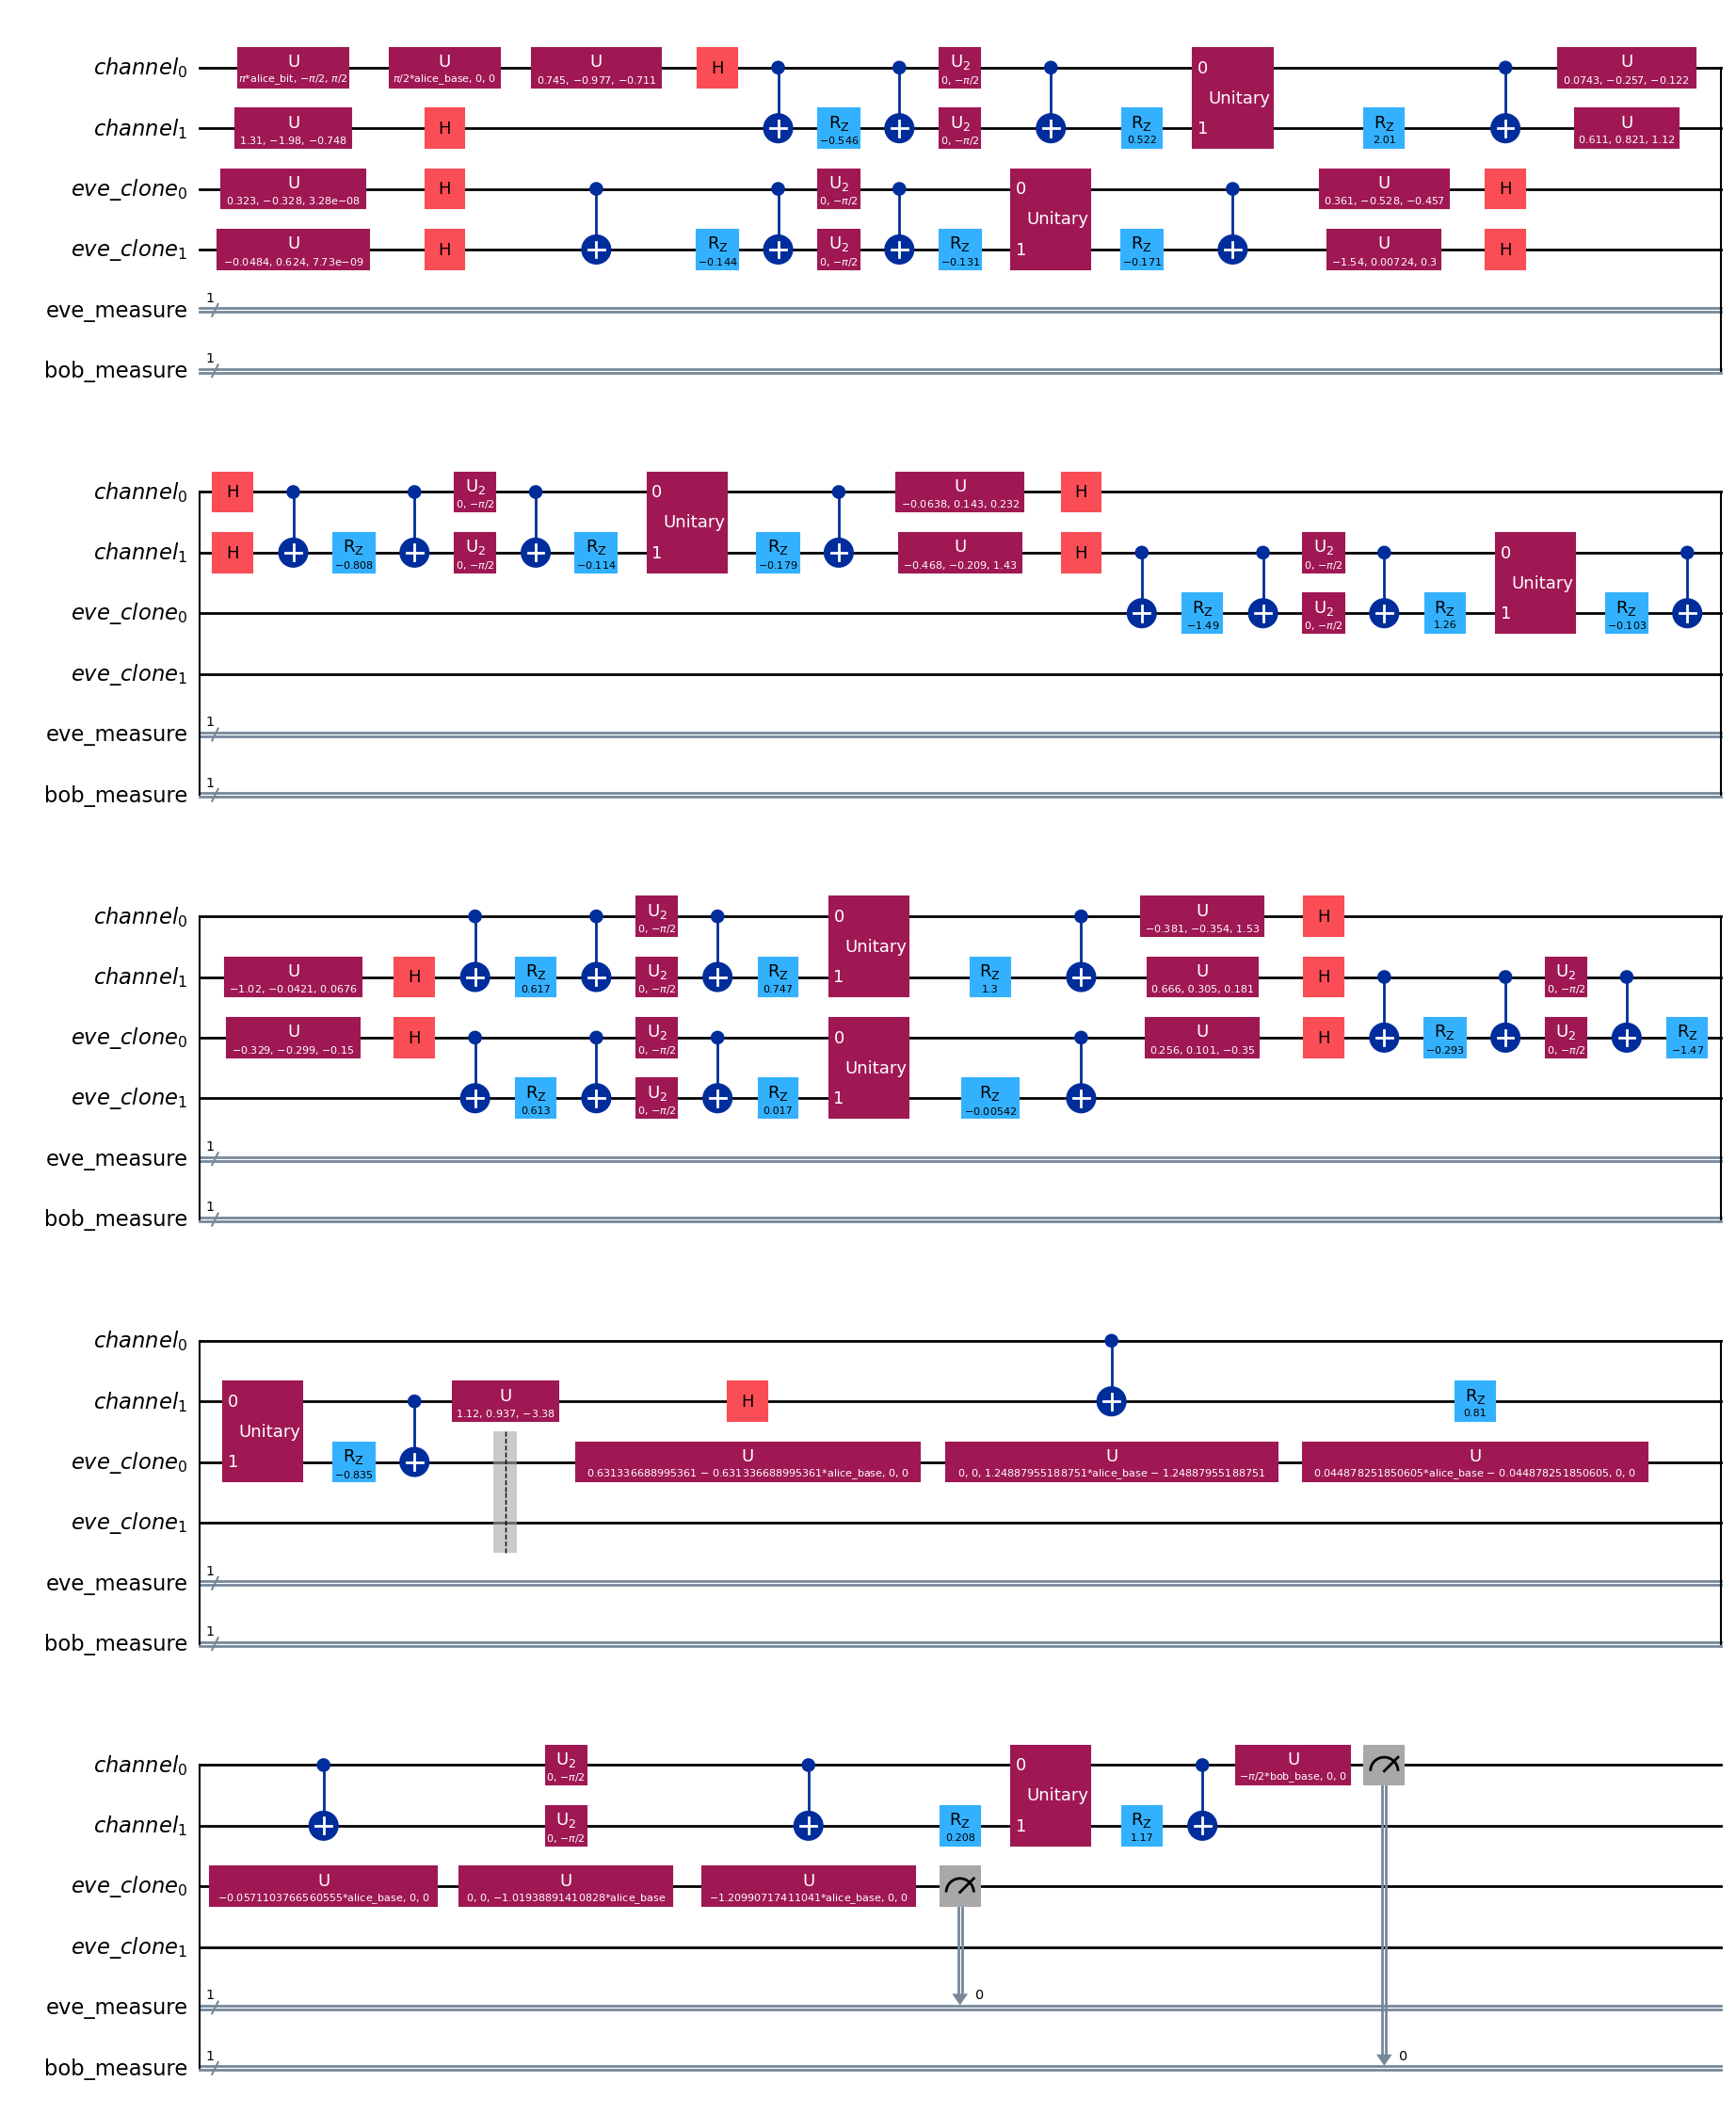

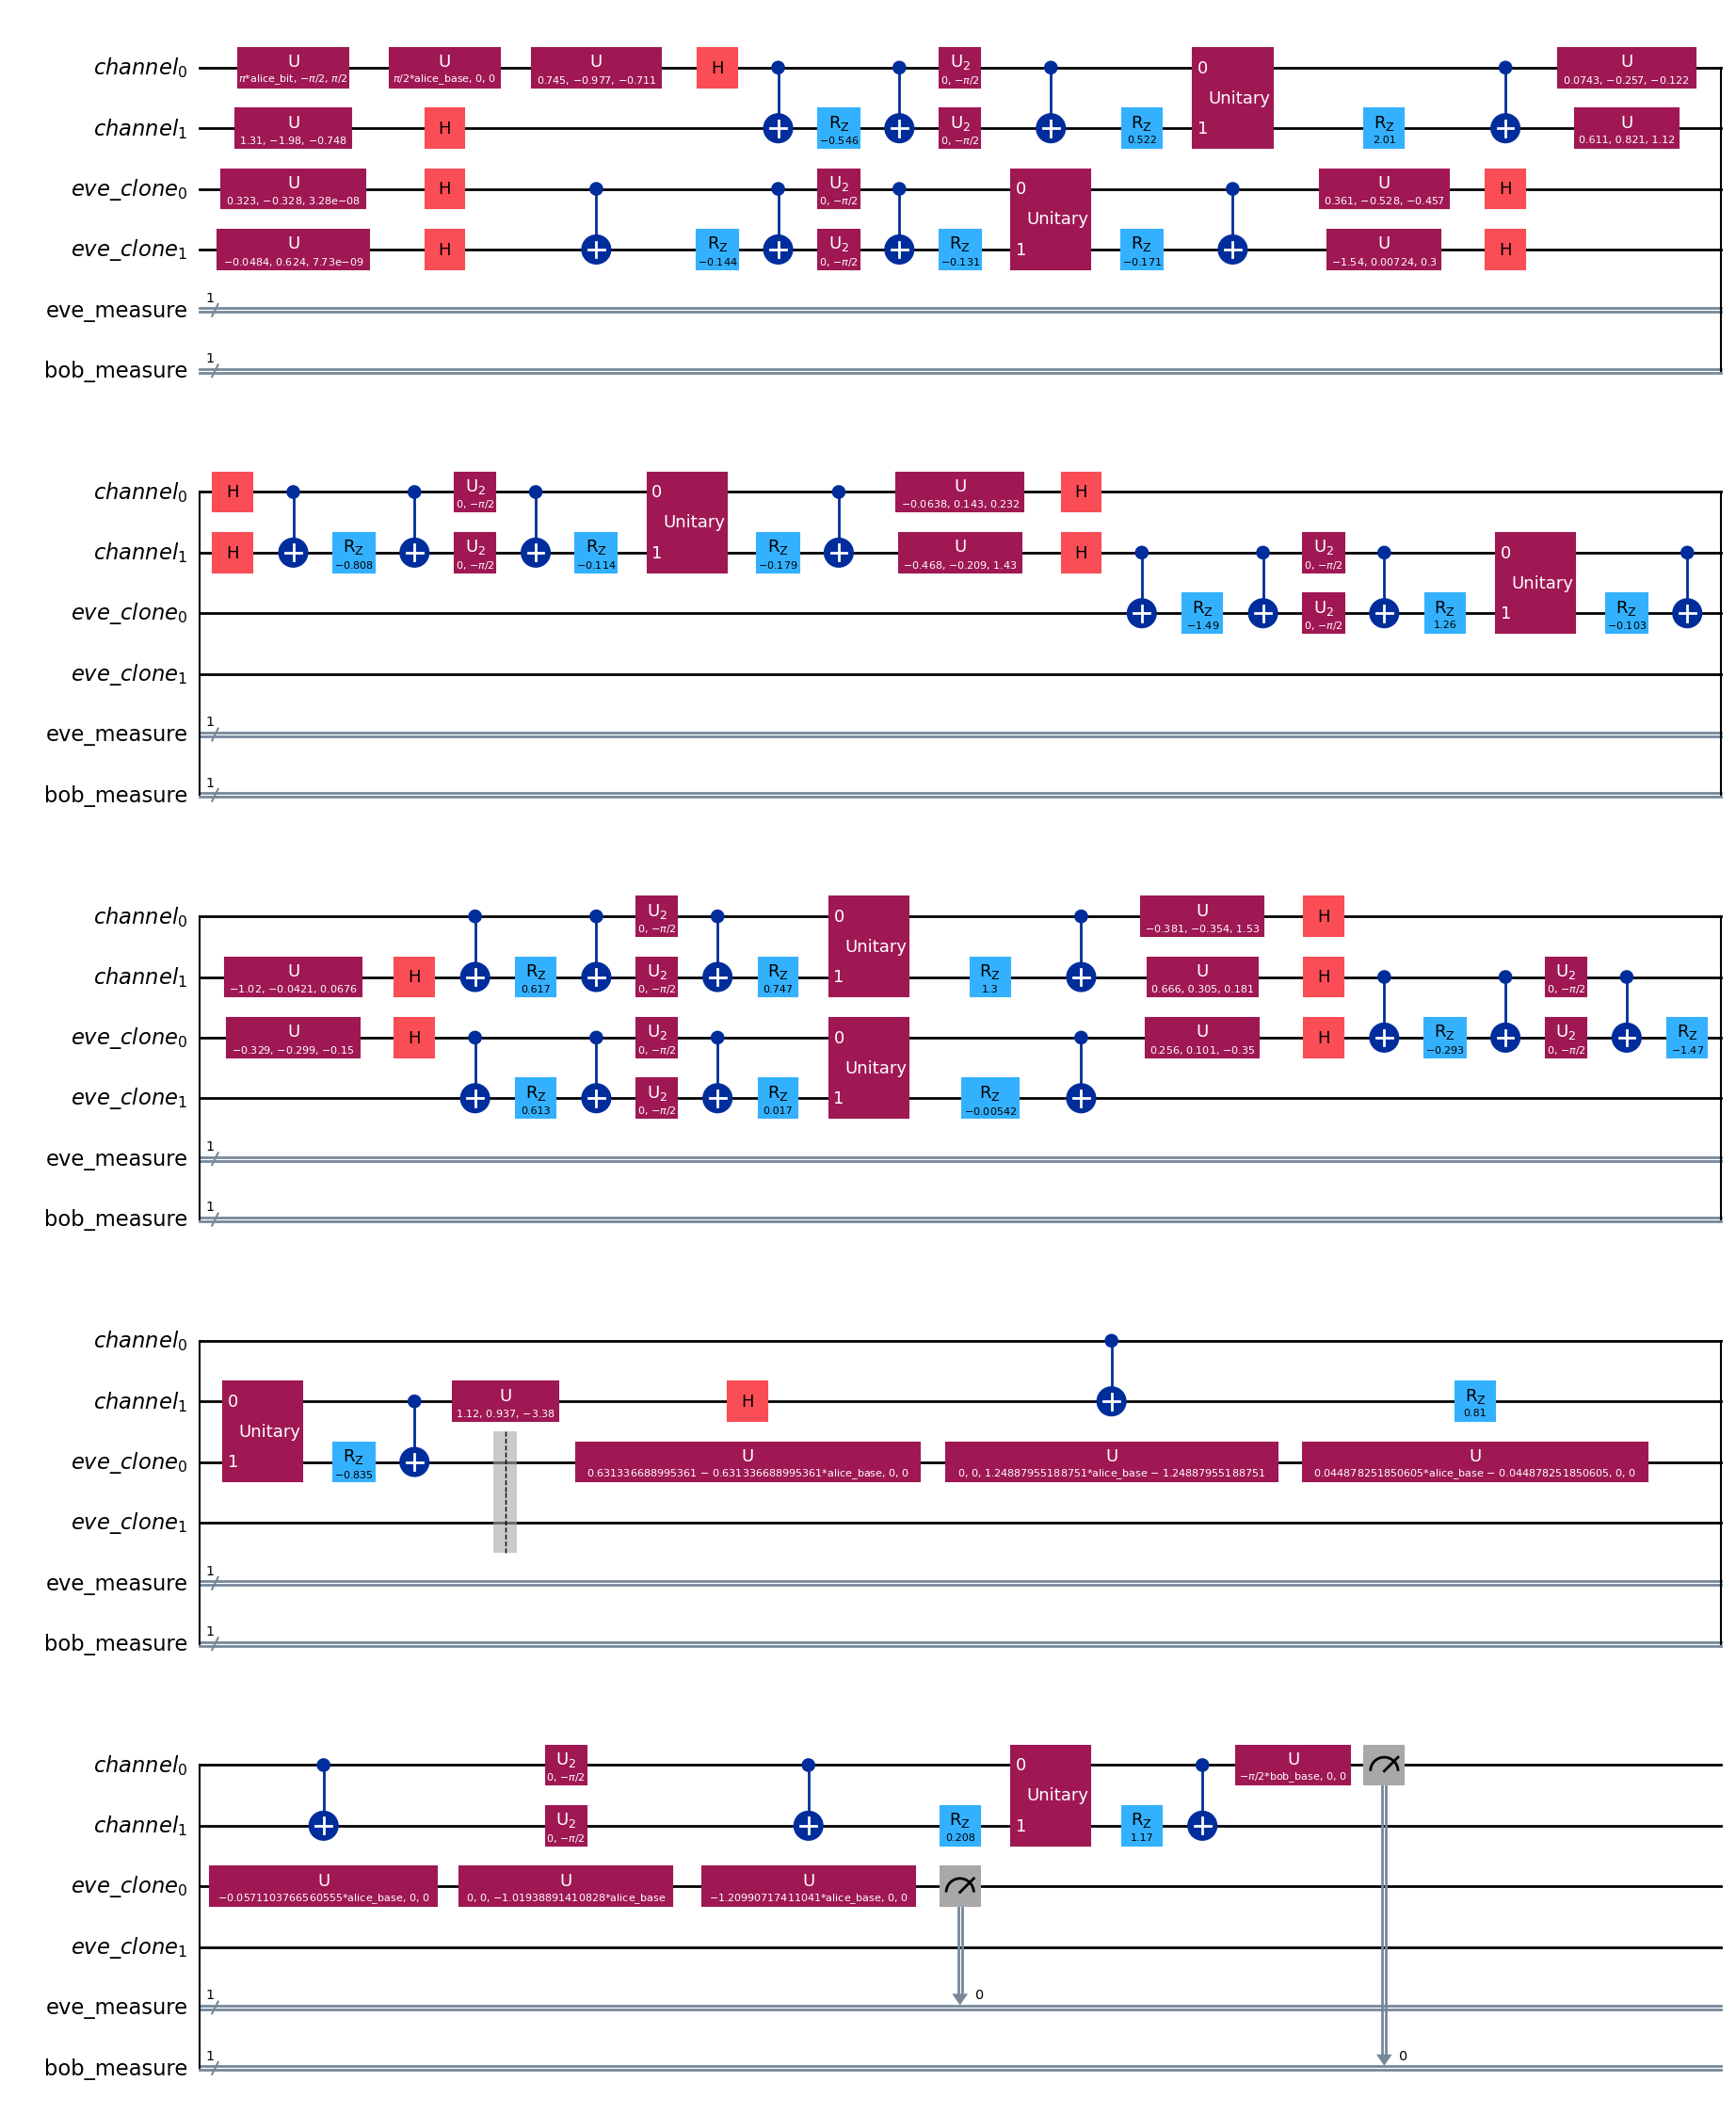

In [19]:
eve_protocol._qc.assign_parameters(eve_protocol.get_all_parameters()).draw("mpl")